
## ZMUM 4 - Lasso

Metodę regularyzacji Lasso używamy do ograniczenia wariancji modelu poprzez eliminację zbędnych cech.

W metodzie LASSO (Least Absolute Shrinkage and Selection Operator) wykorzystujemy normę L1 do wygaszenia cech, które nia mają znaczącego wpływu na model. W przypadku tej metody funkcja kosztu $J_{lasso}(\omega)$ ma następującą postać:

$$J_{lasso}(\omega)=\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2+\lambda \sum_{j=1}^n{|\omega_j|},$$

W przypadku regularyzacji metodą Lasso dokonuje się normalizacji zmiennych opisujących. 

**Celem tego laboratorium jest zapoznanie się z działaniem metod Lasso**.

Materiały pomocnicze, lekkie (wideo) wprowadzenia do :

* [Metody lasso](https://www.youtube.com/watch?v=NGf0voTMlcs)
* [Połączenie regresji Ridge i Lasso - Elastic Net](https://www.youtube.com/watch?v=1dKRdX9bfIo)

Na początek - wczytanie bibliotek oraz wygenerowanie zbioru danych:

In [1]:
# Wczytaj bilbioteki podstawowe
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
# Wczytaj biblioteki potrzebne do zajęć
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

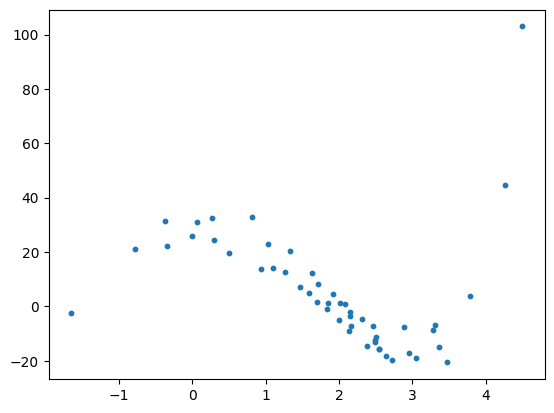

In [3]:
np.random.seed(5)
x = 2 - 3 * np.random.normal(0, 0.5, 50)
y = 30 + x - 8 * (x ** 2) - 0.5 * (x ** 3)+ 0.15 * (x ** 5)  + np.random.normal(-3, 5, 50)
plt.scatter(x,y, s=10)
plt.show()

W przypadku, gdy uzyskany model estymatora miałby być zastosowany do estymacji wartości wyjściowej dla nieznanych wartości wejściowych (a zwykle tak to właśnie wygląda), oryginalny zbiór danych powinien zostać podzielony na zbiór uczący i testowy.

### Zadanie 1:

Do oceny modelu w procesie uczenia stosuje się często walidację krzyżową. W omawianym przypadku wyróżnia się dwa parametry metody - stopień wielomianu funkcji regresji oraz parametr $\lambda$. Zwykle pierwszy z nich jest ustalany a-priori, zaś drugi podlega weryfikacji poprzez wykonanie walidacji krzyżowej estymatorów dla różnych jego wartości. 

Korzystając z walidacji krzyżowej (5-krotny wybór zbioru) na zbiorze treningowym napisz funkcję, która dla wielomianu stopnia 15 narysuje wykres średniego błędu uczenia i średniego błędu walidacji, jak również wykres przedstawiający wartości współczynników modelu w funkcji zmiany parametru regularyzacji $\lambda=[0, 0.01, 0.02, 0.04, 0.08, \cdots, 10]$. Można przyjąć, że $\lambda_{a+1}=24\lambda_a$. Można skorzystać z funkcji [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) lub [Search_Grid_CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [4]:
# Miejsce na potrzebne funkcje
from sklearn import linear_model  # using scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def get_lambdas(min = 0.01, max = 10):
    lambdas = [0,min]
    while lambdas[-1] < max:
        lambdas.append(lambdas[-1] * 2)
    return lambdas

def create_matrix(x, degree):
    X = []
    for i in range(0, len(x)):
        row = []
        for j in range (0, degree + 1):
            row.append(pow(x[i], j))
        X.append(row)
    return X

def verify_lambda(X, y, l, folds = 5):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = linear_model.Lasso(max_iter=10000)
    
    gs = GridSearchCV(model, {'alpha': [l]}, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
    gs.fit(X_scaled, y)

    # Wyniki grid search
    gs_results = gs.cv_results_
    
    # Pobranie najlepszego modelu
    best_model = gs.best_estimator_

    # Współczynniki najlepszego modelu
    w = best_model.coef_
    
    # Średni błąd ze wszystkich walidacji krzyżowych
    validation_error = -gs_results['mean_test_score'][0]
    train_error = -gs_results['mean_train_score'][0]

    # Wypisanie wyników
    print('lambda: {:<6} -> mean(train_error): {:>15} -> mean(val_error): {:>15}'.
          format(l, round(train_error, 3), round(validation_error, 3)))
    
    return validation_error, train_error, w

lambda: 0      -> mean(train_error):           4.847 -> mean(val_error):            19.8
lambda: 0.01   -> mean(train_error):           4.999 -> mean(val_error):           6.344
lambda: 0.02   -> mean(train_error):           5.037 -> mean(val_error):           6.527
lambda: 0.04   -> mean(train_error):            5.16 -> mean(val_error):            6.88
lambda: 0.08   -> mean(train_error):           5.554 -> mean(val_error):           7.911
lambda: 0.16   -> mean(train_error):            6.72 -> mean(val_error):          13.208
lambda: 0.32   -> mean(train_error):           8.831 -> mean(val_error):          19.167
lambda: 0.64   -> mean(train_error):          11.671 -> mean(val_error):          21.468
lambda: 1.28   -> mean(train_error):          16.038 -> mean(val_error):          24.092
lambda: 2.56   -> mean(train_error):          25.465 -> mean(val_error):          28.708
lambda: 5.12   -> mean(train_error):          27.931 -> mean(val_error):          28.371
lambda: 10.24  -> mea

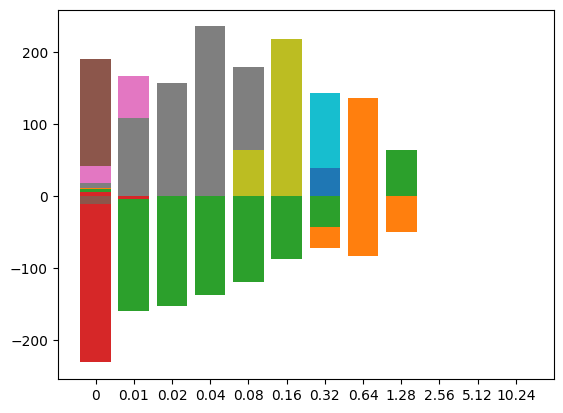

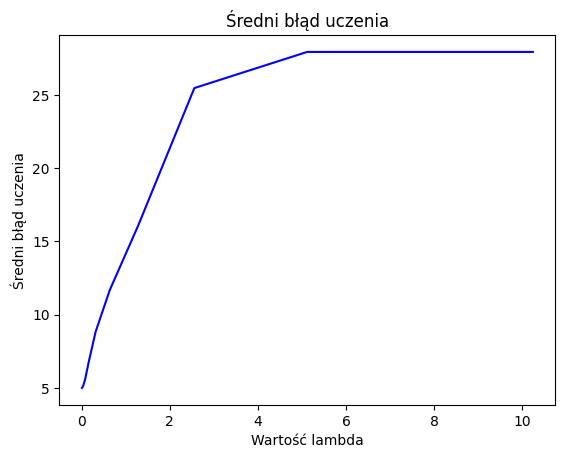

Text(0, 0.5, 'Średni błąd walidacji')

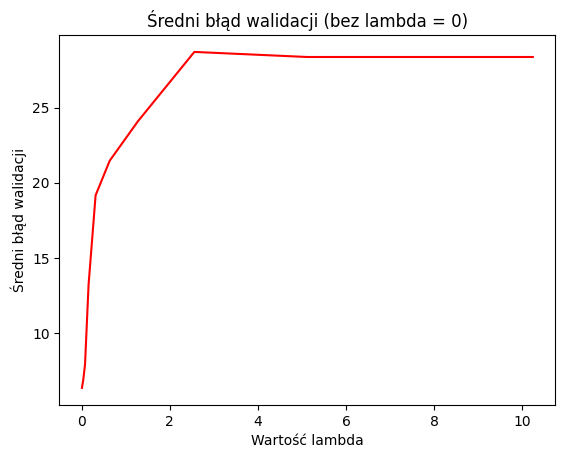

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
X = create_matrix(x, 15)
lambdas = get_lambdas()

# Obliczenie wyników dla wszystkich lambda
results = {lambda_ : verify_lambda(X, y, lambda_) for lambda_ in lambdas}

# Błędy walidacji dla różnych lambda
validation_scores = [x[0] for x in results.values()]

# Błędy uczenia dla różnych lambda
train_scores = [x[1] for x in results.values()]

# Współczynniki dla różnych lambda
coefs = [x[2] for x in results.values()]

# Wypisanie współczynników w zależności od lambda
for i in range(0, 16):
    w_i = [w[i] for w in coefs]
    plt.bar(list(map(str, lambdas)), w_i, tick_label=list(map(str, lambdas)))
plt.show()

# Wykres błędu uczenia
plt.plot(lambdas[1:], train_scores[1:], c='blue')
plt.title("Średni błąd uczenia")
plt.xlabel("Wartość lambda")
plt.ylabel("Średni błąd uczenia")
plt.show()

# Wykres błędu walidacji
plt.plot(lambdas[1:], validation_scores[1:], c='red')
plt.title("Średni błąd walidacji (bez lambda = 0)")
plt.xlabel("Wartość lambda")
plt.ylabel("Średni błąd walidacji")

**Pytania:**
1. Jak zmieniają się wartości współczynników ze zmianą współczynnika regularyzacji $\lambda$?

Wzrost współczynnika regularyzacji powoduje, że wartości współczynników maleją. Jest to zgodne z teorią, która stwierdza, że metoda Lasso próbuje minimalizować wartości względne współczynników prowadząc nawet do całkowitego wyzerowania wagi.

2. Która wartość współczynnika regularyzacji $\lambda$ jest najlepsza dla wybranego modelu?

W analizowanym przypadku wartość współczynnika na poziomie 0.02 pozwala zachować minimalny błąd na zbiorze testowym (6.821).

Wyucz opracowany model (stopnia 15) dla wybranego współczynnik $\lambda$ (uczenie na całym zbiorze treningowym). Wyznacz $\mbox{RMSE}=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2}$ (pierwiastek błędu średniokwadratowego) dla zbioru uczącego i testowego i porównaj z wynikiem otrzymanym dla modelu stopnia 5.  

In [6]:
# Miejsce na potrzebne funkcje
# Stopień 15
# lambda 0.02
X = create_matrix(x, 15)
print("Stopień 15: ")
verify_lambda(X, y, 0.02)

# Stopień 5
# lambda 0.02
print("Stopień 5: ")
X = create_matrix(x, 5)

verify_lambda(X, y, 0.02)
print()

Stopień 15: 
lambda: 0.02   -> mean(train_error):            4.62 -> mean(val_error):           7.252
Stopień 5: 
lambda: 0.02   -> mean(train_error):           4.882 -> mean(val_error):           6.959



**Wniosek**

Większy stopień wielomianu zapewnia mniejszy błąd za zbiorze uczącym, ale większy na zbiorze testowym

### Zadanie 2:
Dla wielomian stopnia = 10 proszę namalować wykres przedstawiający zmianę wartości parametrów modelu (wag) w funkcji lambda.

lambda: 0.01   -> mean(train_error):           4.571 -> mean(val_error):           6.916
lambda: 0.02   -> mean(train_error):           4.713 -> mean(val_error):           7.355
lambda: 0.04   -> mean(train_error):            4.94 -> mean(val_error):           9.026
lambda: 0.08   -> mean(train_error):           5.601 -> mean(val_error):          13.306
lambda: 0.16   -> mean(train_error):           6.636 -> mean(val_error):          17.935
lambda: 0.32   -> mean(train_error):           8.011 -> mean(val_error):          18.655
lambda: 0.64   -> mean(train_error):          10.523 -> mean(val_error):          19.251
lambda: 1.28   -> mean(train_error):          15.066 -> mean(val_error):          20.426
lambda: 2.56   -> mean(train_error):          20.373 -> mean(val_error):          20.606
lambda: 5.12   -> mean(train_error):          21.282 -> mean(val_error):           20.63
lambda: 10.24  -> mean(train_error):          21.282 -> mean(val_error):           20.63


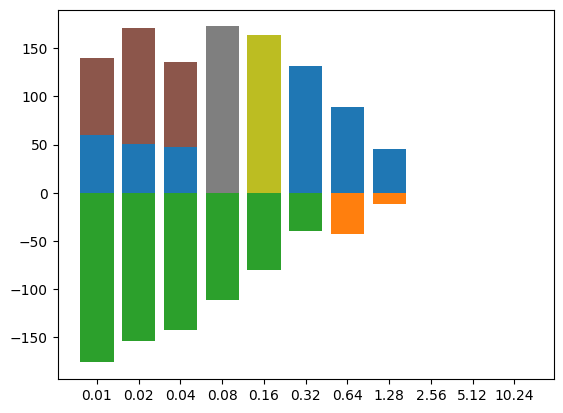

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,-0.000000,-176.162245,51.039421,0.0,140.224173,0.000000,0.000000,0.00000,0.0,59.528177
1,0.0,0.000000,-153.476191,4.346438,0.0,171.213443,0.000000,0.000000,0.00000,0.0,50.910358
2,0.0,-0.000000,-142.012893,0.000000,0.0,136.275488,7.667260,23.561032,0.00000,0.0,47.778074
3,0.0,-4.180857,-111.304134,0.000000,0.0,0.000000,15.300848,172.668476,0.00000,0.0,0.000000
4,0.0,-13.913838,-80.198323,0.000000,0.0,0.000000,0.000000,0.000000,164.02892,0.0,0.000000
5,0.0,-28.287708,-39.578451,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,131.738717
6,0.0,-42.455593,-0.000000,-0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,88.814474
7,0.0,-11.742142,-0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,45.953082
8,0.0,-0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
9,0.0,-0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000


In [7]:
# Miejsce na rozwiązanie
# Miejsce na rozwiązanie
X = create_matrix(x, 10)
lambdas = get_lambdas()[1:]

# Obliczenie wyników dla wszystkich lambda
results = {lambda_ : verify_lambda(X, y, lambda_) for lambda_ in lambdas}

# Współczynniki dla różnych lambda
coefs = [x[2] for x in results.values()]

# Wypisanie współczynników w zależności od lambda
for i in range(0, 11):
    w_i = [w[i] for w in coefs]
    plt.bar(list(map(str, lambdas)), w_i, tick_label=list(map(str, lambdas)))
plt.show()

display(pd.DataFrame(coefs))

**Wnioski**

Wzrost parametru regularyzacyjnego powoduję zmniejszanie wartości bezwględnych współczynników.

## Metoda doboru cech modelu

In [8]:
# Wczytanie danych
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [9]:
# Utworzenie nowych zmiennych
from math import log, sqrt
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']
sales['floors_square'] = sales['floors']*sales['floors']

In [10]:
# Ze zbioru danych wydzielamy zbiór testowy zawierający 20% danych.
from sklearn.model_selection import train_test_split

def add_const(X):
    X0 = np.ones((len(X), 1))
    X.insert(0, 'const', X0)

add_const(sales)

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Zadanie 3 - Metoda Lasso dla regresji ceny nieruchomości

W metodzie LASSO (Least Absolute Shrinkage and Selection Operator) wykorzystujemy normę L1 do wygaszenia cech, które nia mają znaczącego wpływu na model. W przypadku tej metody funkcja kosztu $J_{lasso}(\omega)$ ma następującą postać:

$$J_{lasso}(\omega)=\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2+\lambda \sum_{j=1}^n{|\omega_j|},$$

W przypadku regularyzacji metodą Lasso dokonuje się normalizacji zmiennych opisujących. 

Poniżej przykładowy kod.

In [11]:
from sklearn import linear_model  # using scikit-learn

all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']

scaler = MinMaxScaler()
sales[all_features] = scaler.fit_transform(sales[all_features])

model_all = linear_model.Lasso(alpha=5e2) # set parameters
model_all.fit(sales[all_features], sales['price']) # learn weights

Lasso(alpha=500.0)

**Na podstawie wyników powyższego kodu określ, które cechy zostały wybrane przez algorytm.**

In [12]:
import pandas as pd

coefficients = model_all.coef_

selected_features = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})
selected_features.sort_values(by='Coefficient', ascending=False, inplace=True)

display(selected_features)

,Feature,Coefficient
3,sqft_living,1.877317e+06
12,grade,1.545730e+06
9,waterfront,5.252590e+05
2,bathrooms,2.326169e+05
10,view,2.070742e+05
8,floors_square,9.198240e+04
11,condition,5.307542e+04
16,yr_renovated,1.739724e+04
13,sqft_above,5.532339e+03
1,bedrooms_square,-0.000000e+00


**Wnioski**

Cechy wybrane przez algorytm: sqft_living, grade, waterfront, bathrooms, view, floors_square, condition, yr_renovated, sqft_above. Reszta współczynników została wyzerowana.

Tak samo jak działaliśmy w przypadku regularyzacji grzbietowej, wydziel 20% zbiór testowy, a następnie przy pomocy CV na zbiorze zbiorze uczącym i powyższego kodu, dokonaj doboru współczynnika alpha. Wykreś RMSE oraz współczynniki poszczególnych cech w funkcji zmiany parametru $\lambda$.

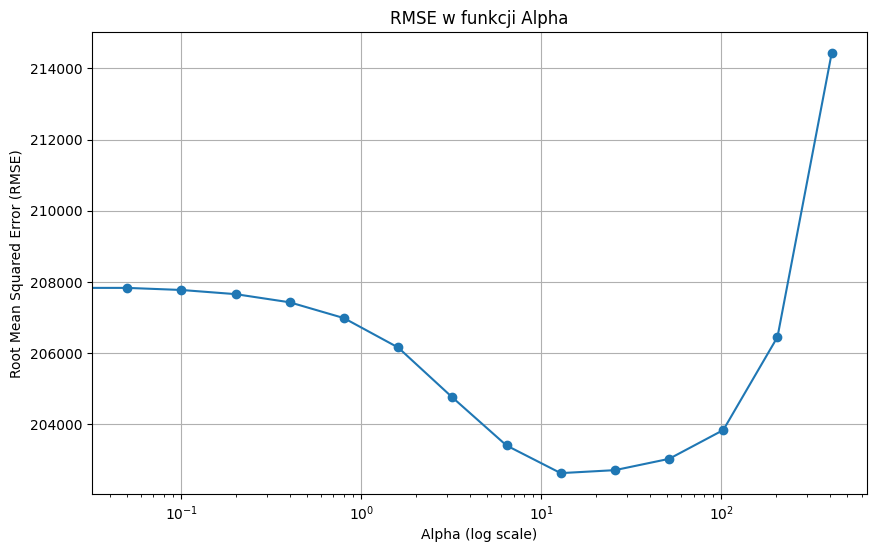

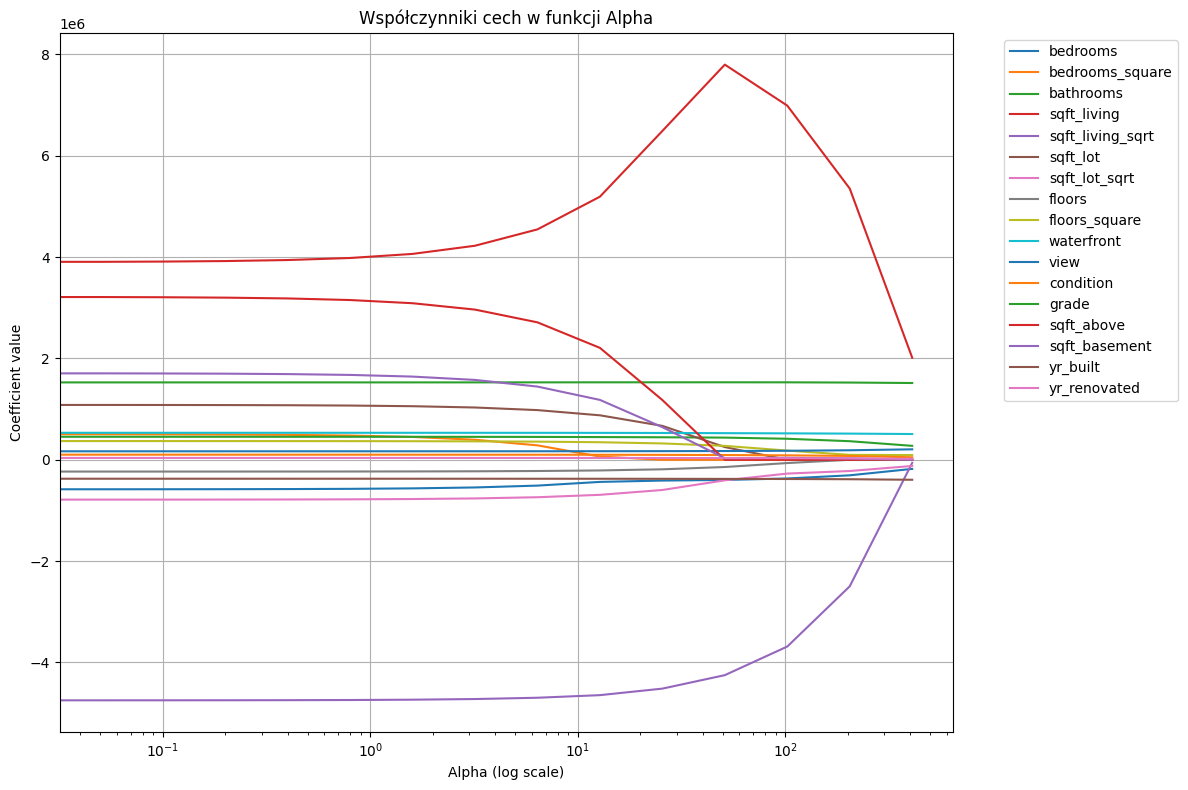

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Wyłączanie ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Podziel zbiór danych na uczący i testowy (20% na testowy)
X = sales[all_features]
y = sales['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wartości alpha do testowania
alpha_values = get_lambdas(0.05,300)

# Przechowywanie wyników
rmse_list = []
coefficients_list = []

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    neg_mse_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_rmse = np.sqrt(-np.mean(neg_mse_scores))
    rmse_list.append(mean_rmse)
    
    lasso.fit(X_train, y_train)
    coefficients_list.append(lasso.coef_)

coefficients_df = pd.DataFrame(coefficients_list, columns=all_features, index=alpha_values)

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, rmse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE w funkcji Alpha')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for feature in all_features:
    plt.plot(alpha_values, coefficients_df[feature], label=feature)

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Współczynniki cech w funkcji Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
lasso = Lasso(alpha=10, max_iter=10000)
neg_mse_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)

coefficients = lasso.coef_

selected_features = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})
selected_features.sort_values(by='Coefficient', ascending=False, inplace=True)

selected_features = selected_features[selected_features['Coefficient'] != 0]

**Pytania:**
1. Jaką wartość parametru $\lambda$ należy wybrać dla naszego modelu ?

Wartość współczynnika na poziomie około 10 gwarantuje najmniejszy błąd na zbiorze testowym.

3. Które z cech, dla ustalonej wartości parametru $\lambda$ wchodzą w skład modelu - podaj w kolejności od najbardziej znaczących cech ?

Dla wybranej wartości parametru następujące wartości wchodzą w skład modelu:

In [15]:
display(selected_features)

,Feature,Coefficient
3,sqft_living,4.908896e+06
13,sqft_above,2.428322e+06
12,grade,1.528025e+06
14,sqft_basement,1.296418e+06
5,sqft_lot,9.222777e+05
9,waterfront,5.312448e+05
2,bathrooms,4.492798e+05
8,floors_square,3.512550e+05
10,view,1.685805e+05
1,bedrooms_square,1.601104e+05


### Zadanie 4 - Metoda spadku względem współrzędnych (ang. coordinate descent)

Celem zadania jest napisanie metody spadku względem współrzędnych przetesowanie jej dla problemu regresji wielomianowej dla wielomianu stopnia 20:
1. Bez regularyzacji.
2. Z regularyzacją Lasso.
Podaną poniżej funkcję należy podzielić na zbiór treningowy i testowy i dokonać jej estymacji.

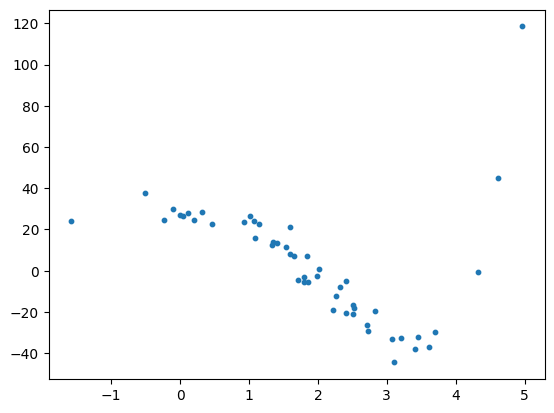

In [16]:
np.random.seed(10)
x = 2 - 3 * np.random.normal(0, 0.5, 50)
y = 30 + x - 5 * (x ** 2) - 2 * (x ** 3)+ 0.15 * (x ** 5)  + np.random.normal(-3, 5, 50)
plt.scatter(x,y, s=10)
plt.show()

## Metoda spadku względem współrzędnych (z normalizacją cech)


### Normalizacja cech
Posiadając zbiór uczący i testowy dokonaj normalizację każdej cechy. Do tego celu należy posłużyć się wartościami normalizującymi wyznaczonymi na **zbiorze uczącym**. Wartość tę wyznaczamy ze wzoru:
$$ normalizator = \sqrt{\sum_{i=1}^Nh_j(x_i)^2} $$

Następnie wykorzysując ją dokonujemy normalizacji cech zbioru uczącego i testowego:

$$ \underline{h}_j(x_k) = \frac{h_j(x_k)}{normalizator}, $$

gdzie $\underline{h}_j(x_k)$ - jest wartością normalizowanej cechy.


### Zadanie 5 - Napisz funkcję normalizującą cechy


In [17]:
def norm_feature(train_x, test_x = pd.DataFrame(), normalizers=[]):
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    
    # Normalizatory
    if len(normalizers) == 0:
        normalizers = np.sqrt(np.sum(train_x ** 2, axis=0))
    
    norm_train_x = train_x / normalizers
    if len(test_x) > 0:
        norm_test_x = test_x / normalizers
    else:
        norm_test_x = pd.DataFrame()
    
    return norm_train_x, norm_test_x, normalizers

In [18]:
X = create_matrix(x, 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, norms = norm_feature(X_train, X_test)

### Metoda spadku względem współrzędnych dla regresji bez regularyzacji

1. Dokonaj inicjacji wag: $ \hat{w} = 0 $ (lub mądrzej)

2. Do osiągnięcia zbieżności:

   Dla $ j=0,1,... , M $:
           
     wyznacz: $ \rho_j = \sum_{i=1}^N\underline{h}_j(x_i) (y_i - \hat{y}_i(\hat{w}_{-j})) $, gdzie $\underline{h}_j(x_i)$ jest znormalizowaną $j$-tą cechą, a $\hat{y}_i(\hat{w}_{-j})$ jest predykcją wartości dla modelu bez $j$-tej cechy 
    
     ustaw $ \hat{w}_j = \rho_j $

In [19]:
def predict(X, w):
    return np.dot(X, w)

def coordinate_descent(X, y, max_iter=10000, tol=1e-6):
    N, M = X.shape
    w = np.zeros(M)  # Inicjalizacja wag na 0
    
    for iteration in range(max_iter):
        w_old = w.copy()
        
        for j in range(M):
            # Oblicz predykcje bez cechy j
            y_pred = predict(X, w) - X[:, j] * w[j]
            
            rho_j = np.dot(X[:, j], (y - y_pred))
            w[j] = rho_j
        
        if np.linalg.norm(w - w_old) < tol:
            print(f"Zbieżność osiągnięta po {iteration} iteracjach.")
            break
    
    return w

# Wykonanie algorytmu
w = coordinate_descent(X_train, y_train)
print("\nOstateczne wagi:")
print(w)


Ostateczne wagi:
[ 174.87755982   48.7081325  -344.76829911 -656.95705425  843.97705191
   84.28886968   42.11742685  -86.63227712  -60.82814212  -32.06236019
    5.55636727   30.19944182   43.37037928   45.58760352   40.04978557
   29.40836384   15.98899279    1.49118615  -12.88709041  -26.37046585
  -38.49660437]


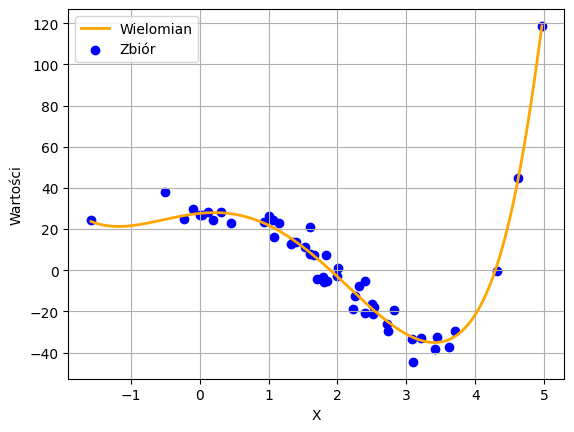

In [20]:
# Oblicz predykcje dla zbiorów
y_pred_train = predict(X_train, w)
y_pred_test = predict(X_test, w)


# Tworzenie wykresu
x_plot = np.linspace(min(x), max(x), 500)
X_plot = create_matrix(x_plot, 20)
X_plot,_,norms = norm_feature(X_plot, pd.DataFrame(), norms)  # Normalizacja
y_plot = predict(X_plot, w)

plt.plot(x_plot, y_plot, color='orange', label='Wielomian', linewidth=2)

plt.scatter(x, y, color='blue', label='Zbiór')
plt.xlabel('X')
plt.ylabel('Wartości')
plt.legend()
plt.grid(True)
plt.show()

### Zadanie 6 - wyznaczenie współczynników regresji metodą spadku koordynatów

Napisz metodę spadku koordynatów bez regularyzacji, wyznacz wartości współrzędnych tą metodą dla wielomianu 5 stopnia i porównaj otrzymane wartości z wynikami otrzymanymi z pseudoowrtoności. (Wykorzystaj wcześniejsze kody lub pakiety scikit-learn).

### Metoda spadku względem współrzędnych dla LASSO

1. Dokonaj inicjacji wag: $ \hat{w} = 0 $ (lub mądrzej)

2. Do osiągnięcia zbieżności:

   Dla $ j=0,1,... , M $:
           
     wyznacz: 
     $ \rho_j = \sum_{i=1}^N\underline{h}_j(x_i) \left(y_i - \hat{y}_i(\hat{w}_{-j})\right) $, gdzie 
     
   * $\underline{h}_j(x_i)$ jest znormalizowaną $j$-tą cechą, 
   
   * $\hat{y}_i(\hat{w}_{-j})$ jest predykcją wartości dla modelu bez $j$-tej cechy. 
    
     Następnie ustaw:
     
     $\hat{w}_j = \begin{cases}
     \rho_j + \frac{\lambda}{2} \mbox{, jeśli } \rho_j < -\frac{\lambda}{2}, \\
     0 \mbox{, jeśli } \rho_j \in \left< -\frac{\lambda}{2},\frac{\lambda}{2}\right>, \\
     \rho_j - \frac{\lambda}{2} \mbox{, jeśli } \rho_j > \frac{\lambda}{2}
     \end{cases}$

Współczynniki (metoda spadku koordynatów):
[27.69069754  1.79371414 -5.59955136 -2.6793127   0.42894517  0.09429511]

Współczynniki (metoda pseudoodwrotności):
[27.43360047  1.42576558 -5.11541332 -2.67009     0.3557339   0.10559382]


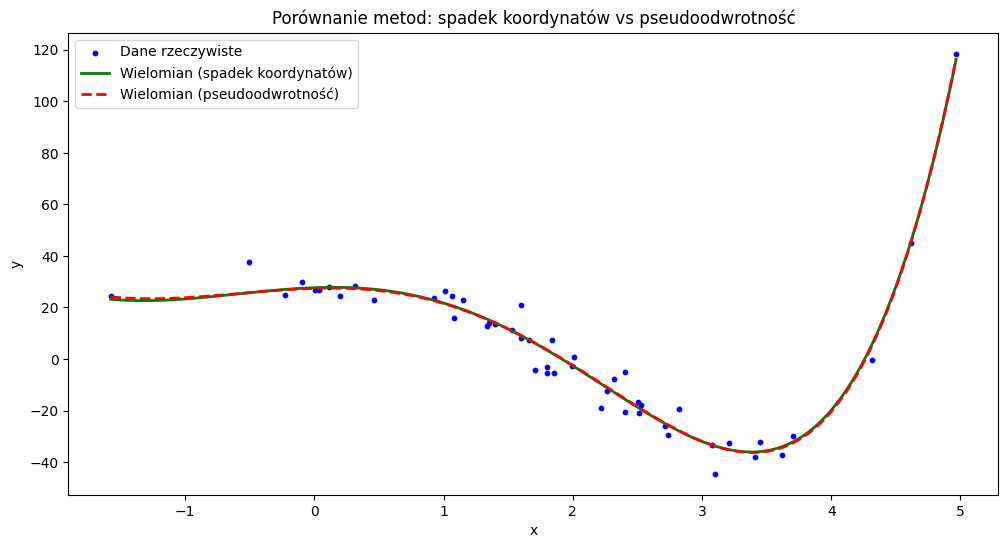

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import pinv

# Implementacja metody spadku koordynatów bez regularyzacji
def coordinate_descent(X, y, alpha, max_iter=1000, tol=1e-6):
    N, M = X.shape
    w = np.zeros(M)  # Inicjalizacja wag na 0
    for iteration in range(max_iter):
        w_old = w.copy()
        for j in range(M):
            # Oblicz predykcję bez cechy j
            y_pred = predict(X, w) - X[:, j] * w[j]
            rho_j = np.dot(X[:, j], (y - y_pred))
            # Aktualizacja wag z regularyzacją LASSO
            if rho_j < -alpha / 2:
                w[j] = (rho_j + alpha / 2) / np.sum(X[:, j] ** 2)
            elif rho_j > alpha / 2:
                w[j] = (rho_j - alpha / 2) / np.sum(X[:, j] ** 2)
            else:
                w[j] = 0
        # Sprawdzenie kryterium zbieżności
        if np.linalg.norm(w - w_old) < tol:
            print(f"Zbieżność osiągnięta po {iteration} iteracjach.")
            break
    return w

X = np.array(create_matrix(x, 5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w_cd = coordinate_descent(X_train, y_train, 0.1)

# Obliczenie współczynników za pomocą pseudoodwrotności
w_pseudo = pinv(X_train).dot(y_train)

# Porównanie współczynników
print("Współczynniki (metoda spadku koordynatów):")
print(w_cd)
print("\nWspółczynniki (metoda pseudoodwrotności):")
print(w_pseudo)

x_plot = np.linspace(min(x), max(x), 500)
X_plot = create_matrix(x_plot, 5)

y_cd = predict(X_plot, w_cd)
y_pseudo = predict(X_plot, w_pseudo)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Dane rzeczywiste', s=10)
plt.plot(x_plot, y_cd, color='green', label='Wielomian (spadek koordynatów)', linewidth=2)
plt.plot(x_plot, y_pseudo, color='red', linestyle='--', label='Wielomian (pseudoodwrotność)', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod: spadek koordynatów vs pseudoodwrotność')
plt.show()


### Zadanie 7 - wyznaczenie współczynników metody Lasso metodą spadku koordynatów

Napisz metodę spadku koordynatów z regularyzacją lasso dla znormalizowanych cech, wyznacz wartości współrzędnych tą metodą dla wielomianu 5 stopnia i porównaj otrzymane wartości z wynikami otrzymanymi z pseudoowrtoności. (Wykorzystaj wcześniejsze kody lub pakiety scikit-learn)

Współczynniki (LASSO - metoda spadku koordynatów):
[ 175.82406528   18.33642159 -275.59793861 -515.38743556  323.96646941
  418.53517031]

Współczynniki (metoda pseudoodwrotności):
[ 173.50532382   20.96486651 -258.17293704 -545.63910333  319.79587419
  435.65051379]


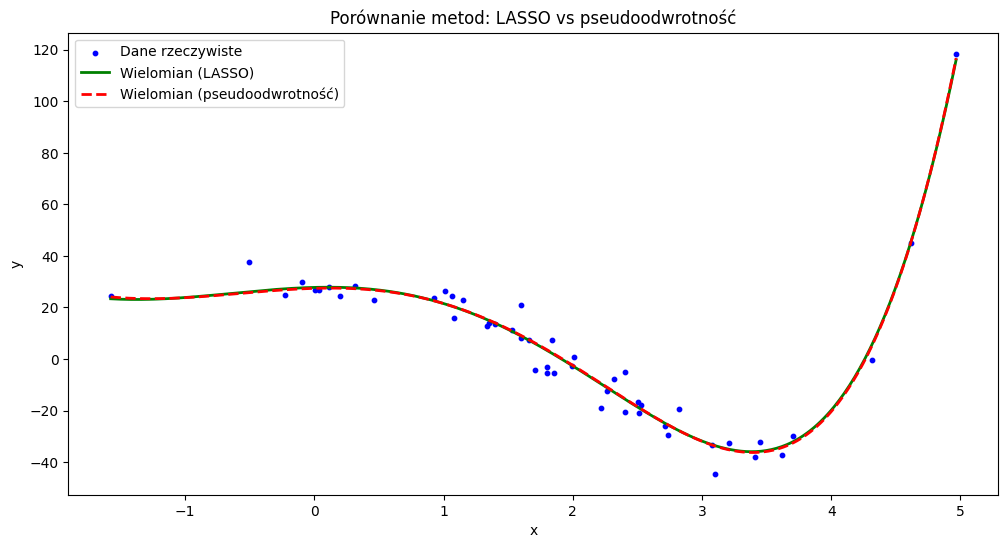

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import pinv

degree = 5
X = create_matrix(x, degree)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZACJA
X_train, X_test, normalizers = norm_feature(X_train, X_test)

# Wyznaczanie współczynników metodą spadku koordynatów z regularyzacją LASSO
alpha = 0.1  # Współczynnik regularyzacji
w_lasso = coordinate_descent(X_train, y_train, alpha)

# Wyznaczanie współczynników metodą pseudoodwrotności
w_pseudo = pinv(X_train).dot(y_train)

# Porównanie współczynników
print("Współczynniki (LASSO - metoda spadku koordynatów):")
print(w_lasso)
print("\nWspółczynniki (metoda pseudoodwrotności):")
print(w_pseudo)

x_plot = np.linspace(min(x), max(x), 500)
X_plot = create_matrix(x_plot, degree)
X_plot = X_plot / normalizers

y_lasso = predict(X_plot, w_lasso)
y_pseudo = predict(X_plot, w_pseudo)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Dane rzeczywiste', s=10)
plt.plot(x_plot, y_lasso, color='green', label='Wielomian (LASSO)', linewidth=2)
plt.plot(x_plot, y_pseudo, color='red', linestyle='--', label='Wielomian (pseudoodwrotność)', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Porównanie metod: LASSO vs pseudoodwrotność')
plt.show()


**Wnioski**

* Metoda spadku koordynatów to efektywne narzędzie w problemach wysokowymiarowych i z regularyzacją, ale wymaga ostrożności przy pracy z nieskalowanymi danymi. Jest to prosty i wszechstronny algorytm umożliwiajacy selekcje cech przy użyciu regularyzacji LASSO.